# Direction Detection using Convolutional Neural Networks

In [4]:
%load_ext autoreload
%autoreload 2

In [15]:
### imports ###
import keras
import network
from read_data import readHDF, convert_2dd
from load_quilt_data import load_data
from visualise_data import plot_confusion_matrix, plot_wrongs
from pylab import *
import numpy as np
from keras.optimizers import Adam, SGD

## Read the data from the hdf data set

This data set includes all the 4000 samples (80% training, 20% test data) and the multi class labels.

The data must then be converted into a data set for the direction detection task (only including the cars and with binary labels).

+ 0= Car in
+ 1= Car out

In [10]:
path = "D:\\ParkHere\\Machine_Learning_scripts\\ANNs\\081118_multi_class_data.h5"
x_train, y_train, x_test, y_test = readHDF(path)


x_train, y_train = convert_2dd(x_train,y_train)
x_test, y_test = convert_2dd(x_test,y_test)

print('After conversion: x train: ',np.shape(x_train),'y train: ',np.shape(y_train),'x test: ',np.shape(x_test),'y test: ',np.shape(y_test))


x train:  (3259, 61, 4) y train:  (3259, 4) x test:  (814, 61, 4) y test:  (814, 4)
After conversion: x train:  (3029, 61, 4) y train:  (3029,) x test:  (756, 61, 4) y test:  (756,)


## Training
### Set Hyperparameters and execute model

The summary of the network parameters and the model architecture is printed.

In [20]:
sgd = SGD(lr=0.01)
adam = keras.optimizers.Adam()
batchsize = 5
epochs = 2
optimizer = adam
activation = 'sigmoid'
minDelta = 0
patience = 5
modelPath = 'D:\ParkHere\Keras_models\CNN_model_'+'dd'+'_test.h5'

print ( ' Activation: '+activation+ ', Optimizer: '+str(optimizer)+
        ', Batch size: '+ str(batchsize)+' Stops at '+
       str(patience) + ' epochs, if no minimum improvement of: ' + str(minDelta))

Network = network.dd_Net(batchsize, epochs, optimizer, activation, minDelta, patience)

Network.exeModel(x_train, x_test, y_train, y_test, modelPath)

 Activation: sigmoid, Optimizer: <keras.optimizers.Adam object at 0x0000015850A75630>, Batch size: 5 Stops at 5 epochs, if no minimum improvement of: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 52, 10)            410       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 26, 10)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 10)            40        
_________________________________________________________________
flatten_4 (Flatten)          (None, 260)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                7830      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3

KeyboardInterrupt: 

## Evaluation
### Plot confusion matrix and a wrong sample of interest

Confusion matrix: shows the distribution of the results.
One of the wrong samples can be plotted for further analysis.

The data is plotted accordingly:
+ x: time in ms
+ y: segment in 1/3m
+ subplot top: sensor strip 0
+ subplot bottom: sensor strip 1
+ filled data points: push
+ unfilled data points: release of sensor
+ colors according to cluster

To evaluate the trained model set the path as above.

[0.00034795] 0
Confusion matrix, without normalization


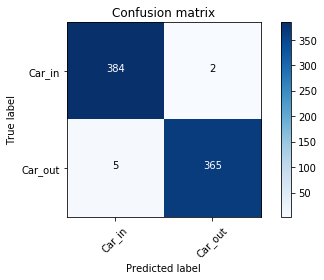

Amount of wrong samples: 7


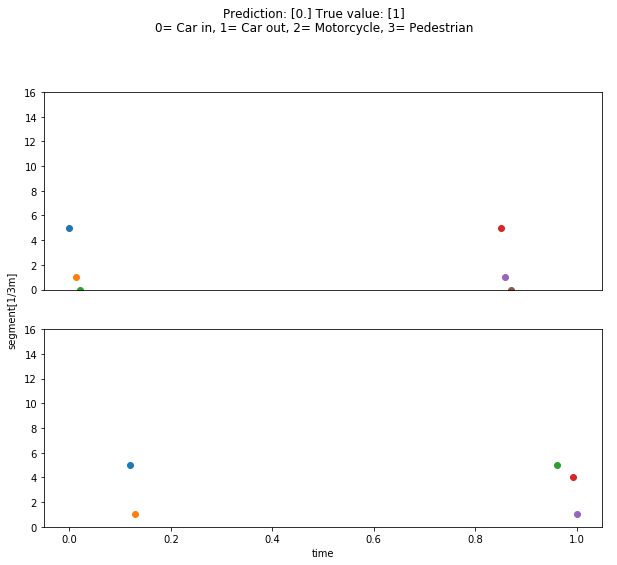

In [38]:
sample = 4
model = 'D:\ParkHere\Keras_models\CNN_model_'+'dd'+'_test.h5'
plot_wrongs(sample, x_test, y_test, model)